## Project: Investigate a Dataset - [Weather dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul> 

<a id='intro'></a>
## Introduction

### The Dataset chosen for analysis: Weather dataset 

>This dataset contains information about weather records at a particular location.

### Question(s) for Analysis
>Q. 1)  Find all the unique 'Wind Speed' values in the data.

>Q. 2) Find the number of times when the 'Weather is exactly Clear'.

>Q. 3) Find the number of times when the 'Wind Speed was exactly 4 km/h'.

>Q. 4) Find out all the Null Values in the data.

>Q. 5) Rename the column name 'Weather' of the dataframe to 'Weather Condition'.

>Q. 6) What is the mean 'Visibility' ?

>Q. 7) What is the Standard Deviation of 'Pressure'  in this data?

>Q. 8) What is the Variance of 'Relative Humidity' in this data ?

>Q. 9) Find all instances when 'Snow' was recorded.

>Q. 10) Find all instances when 'Wind Speed is above 24' and 'Visibility is 25'.

>Q. 11) What is the Mean value of each column against each 'Weather Condition ?

>Q. 12) Find all instances when :
A. 'Weather is Clear' and 'Relative Humidity is greater than 50'
or
B. 'Visibility is above 40'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [73]:
#Loading the data..
df = pd.read_csv('1. Weather Data.csv')
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [75]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


## Data Cleaning
### The Data Structure:
>Before cleaning the data, we have investigated the structure of our dataset and if there is any null values, missing values,  inconsistency or inadequate datatype, There were also unecessary columns with missing data, inadequate datatypes

###  The Cleaning Process:
>I adjusted 'date/time' from string to date datatype.

>I checked for null values.

>I checked for duplicated rows.

In [76]:
#improving the columns names for easier manipulation
df.rename(columns=lambda x: x.strip().lower().replace(' ','_'), inplace=True)

In [77]:
df.head(1)

,date/time,temp_c,dew_point_temp_c,rel_hum_%,wind_speed_km/h,visibility_km,press_kpa,weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog


In [78]:
df['date/time'] = pd.to_datetime(df['date/time'])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date/time         8784 non-null   datetime64[ns]
 1   temp_c            8784 non-null   float64       
 2   dew_point_temp_c  8784 non-null   float64       
 3   rel_hum_%         8784 non-null   int64         
 4   wind_speed_km/h   8784 non-null   int64         
 5   visibility_km     8784 non-null   float64       
 6   press_kpa         8784 non-null   float64       
 7   weather           8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


In [80]:
df.isnull().sum()

date/time           0
temp_c              0
dew_point_temp_c    0
rel_hum_%           0
wind_speed_km/h     0
visibility_km       0
press_kpa           0
weather             0
dtype: int64

In [81]:
df.duplicated().sum()

0

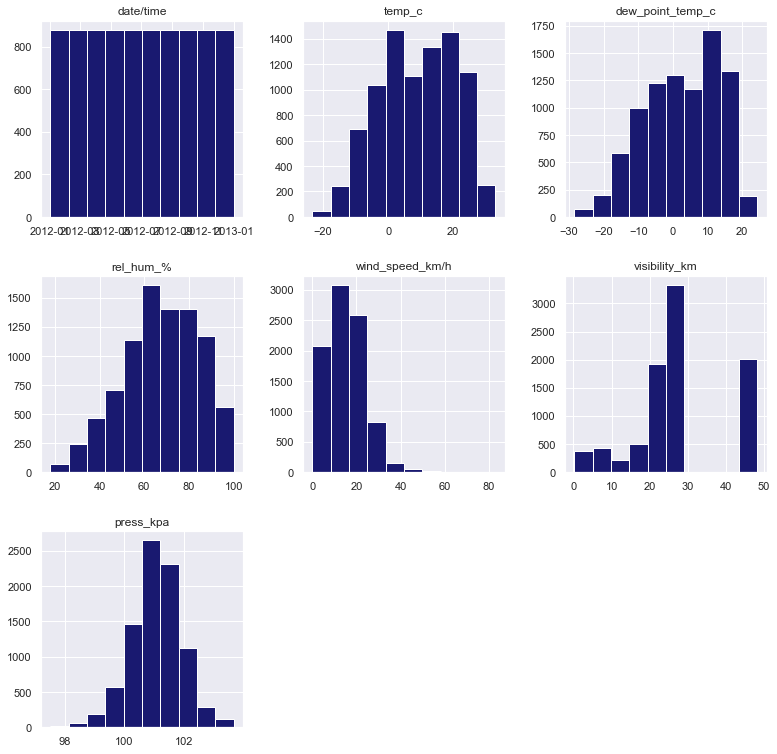

In [82]:
df.hist(figsize=(13,13),
        color = 'midnightblue');

In [22]:
df.nunique()

date/time           8784
temp_c               533
dew_point_temp_c     489
rel_hum_%             83
wind_speed_km/h       34
visibility_km         24
press_kpa            518
weather               50
dtype: int64

# Q1: Find all the unique "Wind Speed" values in the data

In [23]:
df.head(1)

,date/time,temp_c,dew_point_temp_c,rel_hum_%,wind_speed_km/h,visibility_km,press_kpa,weather
0,2012-01-01,-1.8,-3.9,86,4,8.0,101.24,Fog


In [24]:
df['wind_speed_km/h'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2],
      dtype=int64)

In [25]:
df['wind_speed_km/h'].value_counts()

9     830
11    791
13    735
15    719
7     677
17    666
19    616
6     609
20    496
4     474
22    439
24    374
0     309
26    242
28    205
30    161
32    139
33     85
35     53
37     45
39     24
41     22
44     14
48     13
43     13
46     11
52      7
57      5
50      4
2       2
70      1
54      1
83      1
63      1
Name: wind_speed_km/h, dtype: int64

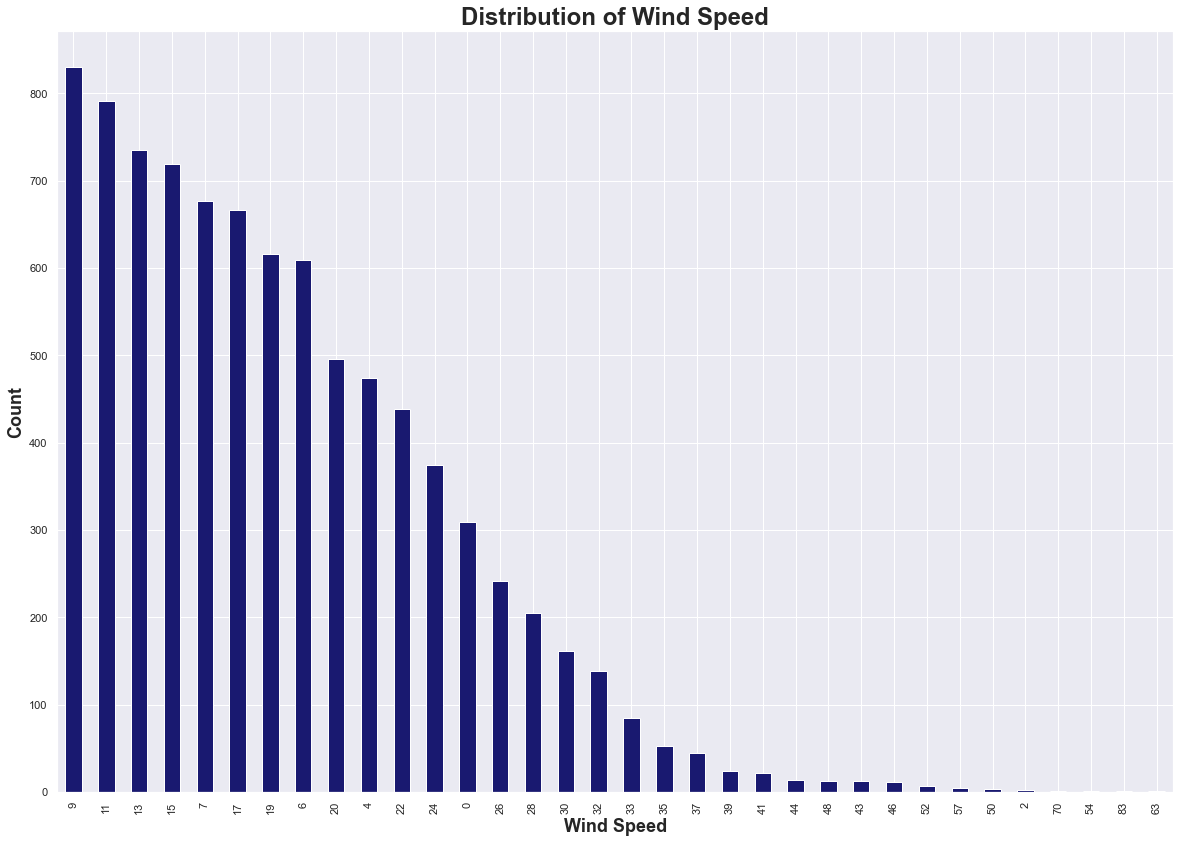

In [84]:
#Visualizing the data..
plt.figure(figsize=(20,14))
df['wind_speed_km/h'].value_counts().plot(kind = 'bar',
                                          color = 'midnightblue')
plt.title('Distribution of Wind Speed', fontsize = 24, weight = 'bold')
plt.xlabel('Wind Speed', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18 , weight = 'bold')
plt.show();

# Q2: Find the number of times when the wheather is exactly clear

### Using query function: 

In [28]:
df.head(1)

,date/time,temp_c,dew_point_temp_c,rel_hum_%,wind_speed_km/h,visibility_km,press_kpa,weather
0,2012-01-01,-1.8,-3.9,86,4,8.0,101.24,Fog


In [30]:
weather_clear = df.query('weather == "Clear"')

In [34]:
weather_clear['weather'].value_counts()

Clear    1326
Name: weather, dtype: int64

### Using groupby function:

In [35]:
#groupby
df.groupby('weather').get_group('Clear')

,date/time,temp_c,dew_point_temp_c,rel_hum_%,wind_speed_km/h,visibility_km,press_kpa,weather
67,2012-01-03 19:00:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,2012-01-05 18:00:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,2012-01-05 19:00:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,2012-01-05 20:00:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,2012-01-05 21:00:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,2012-12-26 06:00:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,2012-12-28 10:00:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,2012-12-29 01:00:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,2012-12-29 02:00:00,-11.8,-13.1,90,13,25.0,101.33,Clear


# Q3: Find the number of times when the wind speed is exactly 4 km/h

In [37]:
df.head(1)

,date/time,temp_c,dew_point_temp_c,rel_hum_%,wind_speed_km/h,visibility_km,press_kpa,weather
0,2012-01-01,-1.8,-3.9,86,4,8.0,101.24,Fog


In [42]:
df['wind_speed_km/h'].value_counts()

9     830
11    791
13    735
15    719
7     677
17    666
19    616
6     609
20    496
4     474
22    439
24    374
0     309
26    242
28    205
30    161
32    139
33     85
35     53
37     45
39     24
41     22
44     14
48     13
43     13
46     11
52      7
57      5
50      4
2       2
70      1
54      1
83      1
63      1
Name: wind_speed_km/h, dtype: int64

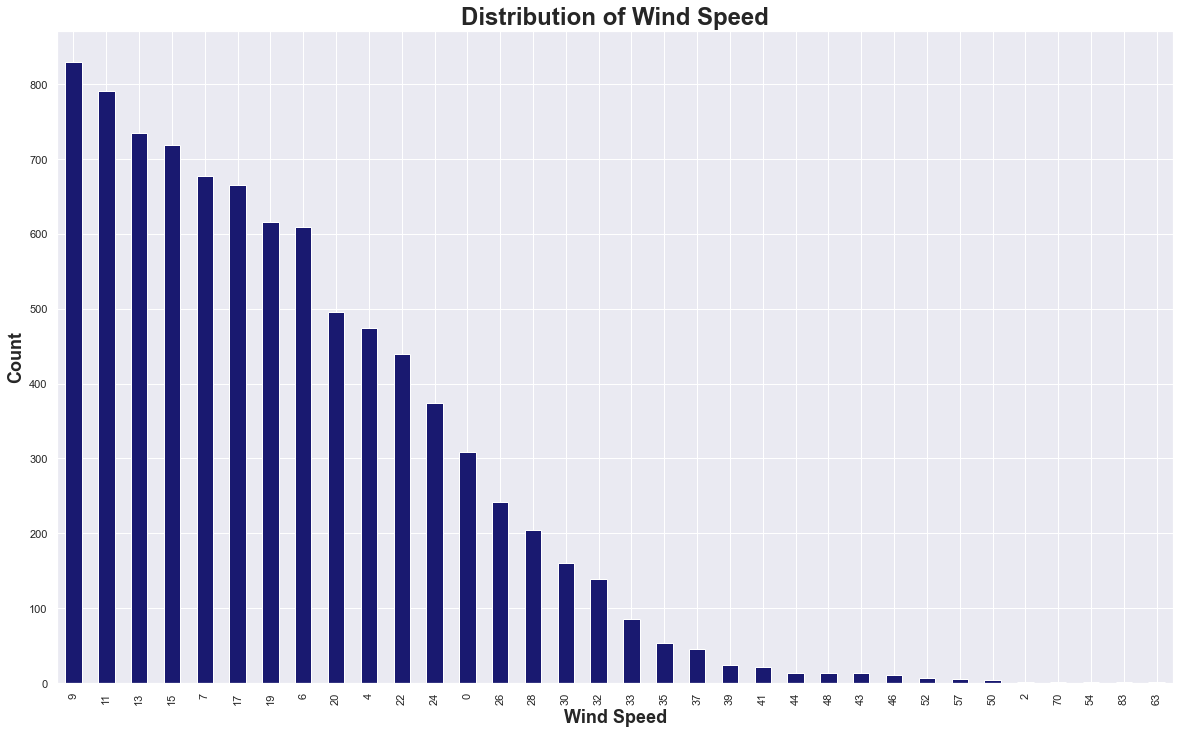

In [88]:
plt.figure(figsize=(20,12))
df['wind_speed_km/h'].value_counts().plot(kind = 'bar',
                                          color = 'midnightblue')
plt.title('Distribution of Wind Speed', fontsize = 24, weight = 'bold')
plt.xlabel('Wind Speed', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.show();

In [38]:
wind_4 = df[df['wind_speed_km/h'] == 4]

In [39]:
wind_4

,date/time,temp_c,dew_point_temp_c,rel_hum_%,wind_speed_km/h,visibility_km,press_kpa,weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
96,2012-01-05 00:00:00,-8.8,-11.7,79,4,9.7,100.32,Snow
101,2012-01-05 05:00:00,-7.0,-9.5,82,4,4.0,100.19,Snow
146,2012-01-07 02:00:00,-8.1,-11.1,79,4,19.3,100.15,Cloudy
...,...,...,...,...,...,...,...,...
8768,2012-12-31 08:00:00,-8.6,-10.3,87,4,3.2,101.14,Snow Showers
8769,2012-12-31 09:00:00,-8.1,-9.6,89,4,2.4,101.09,Snow
8770,2012-12-31 10:00:00,-7.4,-8.9,89,4,6.4,101.05,"Snow,Fog"
8772,2012-12-31 12:00:00,-5.8,-7.5,88,4,12.9,100.78,Snow


# Q4: Find the null values in the dataset

In [89]:
df.isnull().sum()

date/time           0
temp_c              0
dew_point_temp_c    0
rel_hum_%           0
wind_speed_km/h     0
visibility_km       0
press_kpa           0
weather             0
dtype: int64

>There is no null values in the dataset

# Q5: Rename the column name 'weather' to 'weather_condition'

In [45]:
df.rename(columns={'weather':'weather_condition'}, inplace=True)

In [46]:
#Checking...
df.head(1)

,date/time,temp_c,dew_point_temp_c,rel_hum_%,wind_speed_km/h,visibility_km,press_kpa,weather_condition
0,2012-01-01,-1.8,-3.9,86,4,8.0,101.24,Fog


# Q6: What is the mean visibility?

In [47]:
df.head(1)

,date/time,temp_c,dew_point_temp_c,rel_hum_%,wind_speed_km/h,visibility_km,press_kpa,weather_condition
0,2012-01-01,-1.8,-3.9,86,4,8.0,101.24,Fog


In [48]:
df['visibility_km'].mean()

27.66444672131151

# Q7: What is the standard deviation of the pressure?

In [49]:
df['press_kpa'].std()

0.8440047459486474

# Q8: What is the variance of relative humidity?

In [50]:
df['rel_hum_%'].var()

286.2485501984998

# Q9: Find all the instances when snow was recorded

In [52]:
df.groupby('weather_condition').get_group('Snow')

,date/time,temp_c,dew_point_temp_c,rel_hum_%,wind_speed_km/h,visibility_km,press_kpa,weather_condition
55,2012-01-03 07:00:00,-14.0,-19.5,63,19,25.0,100.95,Snow
84,2012-01-04 12:00:00,-13.7,-21.7,51,11,24.1,101.25,Snow
86,2012-01-04 14:00:00,-11.3,-19.0,53,7,19.3,100.97,Snow
87,2012-01-04 15:00:00,-10.2,-16.3,61,11,9.7,100.89,Snow
88,2012-01-04 16:00:00,-9.4,-15.5,61,13,19.3,100.79,Snow
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [63]:
df[df['weather_condition'].str.contains('Snow')]

,date/time,temp_c,dew_point_temp_c,rel_hum_%,wind_speed_km/h,visibility_km,press_kpa,weather_condition
41,2012-01-02 17:00:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
44,2012-01-02 20:00:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers
45,2012-01-02 21:00:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers
47,2012-01-02 23:00:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers
48,2012-01-03 00:00:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [92]:
weather_highest_20 = df['weather'].value_counts().head(20)

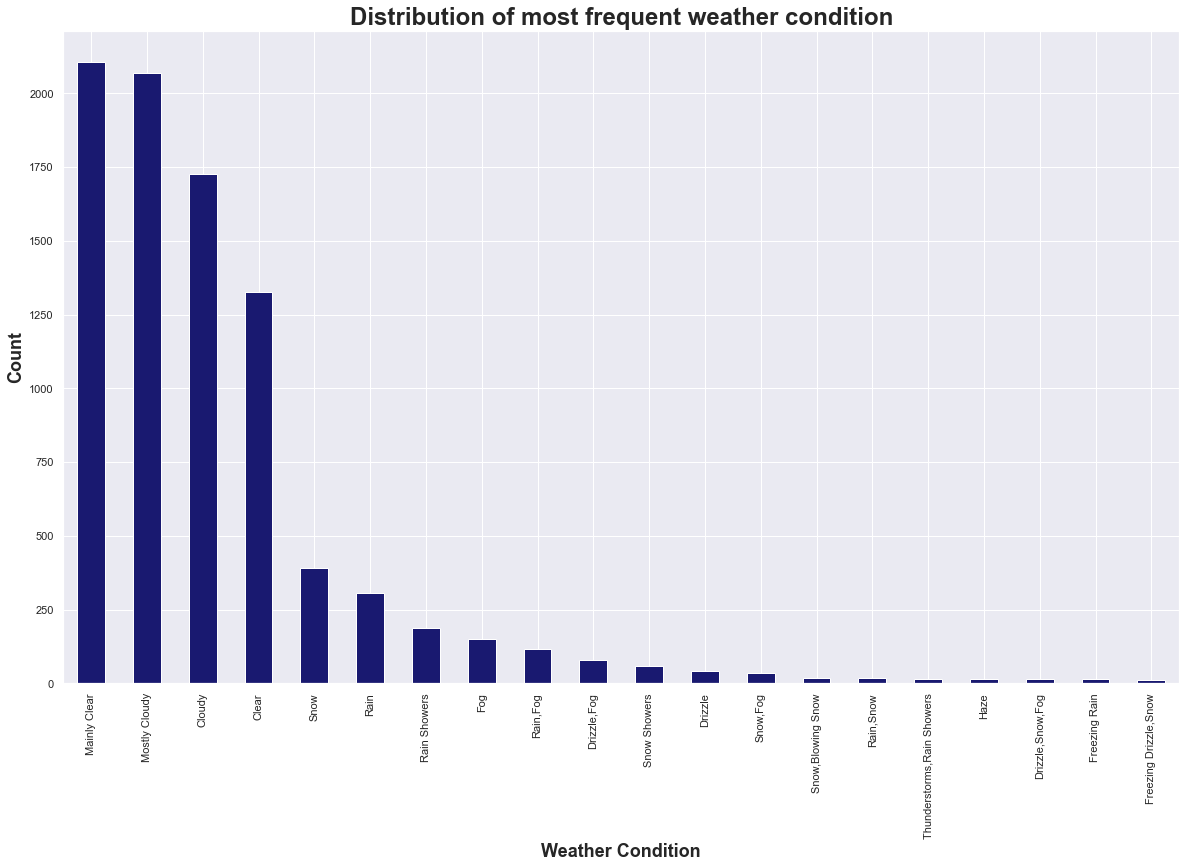

In [94]:
plt.figure(figsize=(20,12))
weather_highest_20.plot(kind = 'bar',
                        color = 'midnightblue')
plt.title('Distribution of most frequent weather condition', fontsize = 24, weight = 'bold')
plt.xlabel('Weather Condition', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.show();

# Q10: find all instances when wind speed is above 24 and visiblity is 25

In [54]:
df.head(1)

,date/time,temp_c,dew_point_temp_c,rel_hum_%,wind_speed_km/h,visibility_km,press_kpa,weather_condition
0,2012-01-01,-1.8,-3.9,86,4,8.0,101.24,Fog


In [56]:
y = df.query('visibility_km == 25')

In [59]:
z = y[y['wind_speed_km/h'] > 24]

In [60]:
z

,date/time,temp_c,dew_point_temp_c,rel_hum_%,wind_speed_km/h,visibility_km,press_kpa,weather_condition
23,2012-01-01 23:00:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,2012-01-02 00:00:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,2012-01-02 01:00:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,2012-01-02 02:00:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,2012-01-02 03:00:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8705,2012-12-28 17:00:00,-8.6,-12.0,76,26,25.0,101.34,Mainly Clear
8753,2012-12-30 17:00:00,-12.1,-15.8,74,28,25.0,101.26,Mainly Clear
8755,2012-12-30 19:00:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
8759,2012-12-30 23:00:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


## A simple Solution:

In [68]:
df[(df['visibility_km'] == 25)&(df['wind_speed_km/h'] > 24 )]

,date/time,temp_c,dew_point_temp_c,rel_hum_%,wind_speed_km/h,visibility_km,press_kpa,weather_condition
23,2012-01-01 23:00:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,2012-01-02 00:00:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,2012-01-02 01:00:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,2012-01-02 02:00:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,2012-01-02 03:00:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8705,2012-12-28 17:00:00,-8.6,-12.0,76,26,25.0,101.34,Mainly Clear
8753,2012-12-30 17:00:00,-12.1,-15.8,74,28,25.0,101.26,Mainly Clear
8755,2012-12-30 19:00:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
8759,2012-12-30 23:00:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


# Q11: What is the mean value of each column against each 'weather_condition'

In [70]:
df.groupby('weather_condition').mean()

,temp_c,dew_point_temp_c,rel_hum_%,wind_speed_km/h,visibility_km,press_kpa
weather_condition,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857


# Q12: Find all instances when: A weather is clear and relative humidity is higher than 50 or visibity is above 40
        

In [72]:
df[(df['weather_condition'] == 'Claer')&(df['rel_hum_%'] > 50) | (df['visibility_km'] > 40)]

,date/time,temp_c,dew_point_temp_c,rel_hum_%,wind_speed_km/h,visibility_km,press_kpa,weather_condition
106,2012-01-05 10:00:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,2012-01-05 11:00:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear
108,2012-01-05 12:00:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear
109,2012-01-05 13:00:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear
110,2012-01-05 14:00:00,-5.1,-10.7,65,22,48.3,100.46,Mainly Clear
...,...,...,...,...,...,...,...,...
8748,2012-12-30 12:00:00,-12.2,-15.7,75,26,48.3,100.91,Mostly Cloudy
8749,2012-12-30 13:00:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8750,2012-12-30 14:00:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear
8751,2012-12-30 15:00:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear
